In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import string
import numpy as np

In [2]:
datascience_df = pd.read_csv("sample_data/dataset_overall.csv",parse_dates=True)
datascience_df = datascience_df.dropna()
import re
def simple_clean_text(x):
    x = x.lower()
    x = re.sub('[^a-z]'," ",x)
    x = re.sub(' +',' ',x).strip()
    words = x.split()
    return " ".join(words)
datascience_df['description'] = datascience_df['description'].apply(lambda x: simple_clean_text(x))
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
stop.extend(['trump','donald','kamala','harris','joe','biden','melania','ivanka'])
datascience_df['date'] = pd.to_datetime(datascience_df['date'])
datascience_df['description_without_stopwords'] = datascience_df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
docs = datascience_df['description_without_stopwords']
month_groups = {month: df_group for month, df_group in datascience_df.groupby(datascience_df['date'].dt.strftime('%Y-%m'))}
df = []
# Save each month's dataset or view it
for month, data in month_groups.items():
    #print(f"\nData for {month}:\n")
    df.append(data)
#print(df[0])
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
no_features =1000 #max number of words to be consider in the analysis
no_topics = 40 #number of topics to consider
no_top_words = 10 #number of topics to display for each topic
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features,stop_words="english")
#after defining the vectorizer we will fit it on the data that we have cleaned
tf = tf_vectorizer.fit_transform(datascience_df['description_without_stopwords'])
#tf = tf_vectorizer.fit_transform(df[7]['description_without_stopwords'])
tf_feature_names = tf_vectorizer.get_feature_names_out()
lda = LatentDirichletAllocation(n_components=no_topics,max_iter=20,learning_method='online',learning_offset=50,random_state=0).fit(tf)
lda
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words -1:-1]])
    return topics
topics = display_topics(lda,tf_feature_names,no_top_words)
topics

{'Topic 0': 'bnp party rizvi secretary rally general leaders joint kabir senior',
 'Topic 1': 'report protesters clashes activists took seen areas time attacks police',
 'Topic 2': 'case court police filed dhaka day station remand metropolitan arrested',
 'Topic 3': 'india bangladesh minister indian said foreign prime modi hasina relations',
 'Topic 4': 'university advisor party student said politics chief political government reforms',
 'Topic 5': 'students discrimination student chhatra university alo shibir committee dhaka central',
 'Topic 6': 'abdullah asked coordinator questions meeting want attack constitution today think',
 'Topic 7': 'commission government work adviser chief months clashes new th significant',
 'Topic 8': 'jamaat said government party awami league meeting islami chief secretary',
 'Topic 9': 'azam ali file mn fall commissioner sms db bdst city',
 'Topic 10': 'league awami election th independent party jatiya elected constituency parliament',
 'Topic 11': 'poli

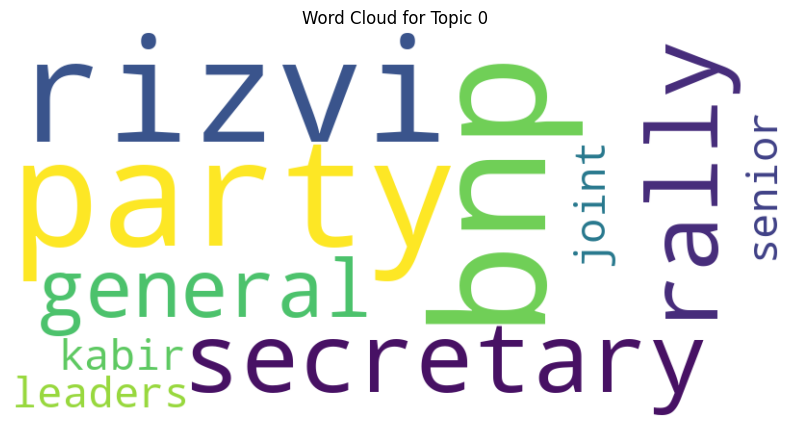

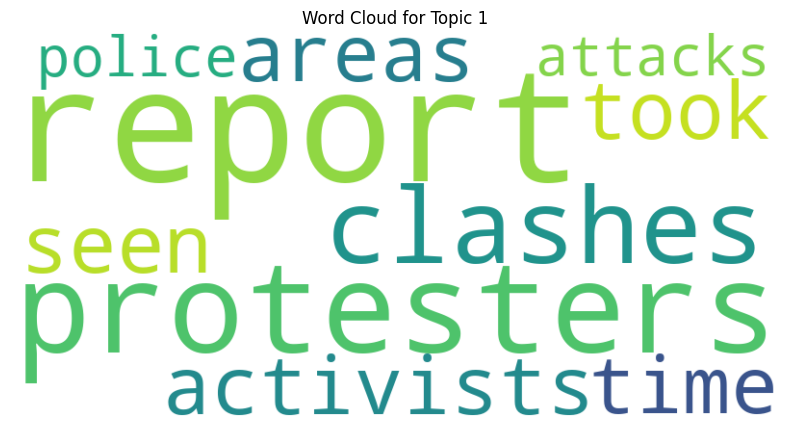

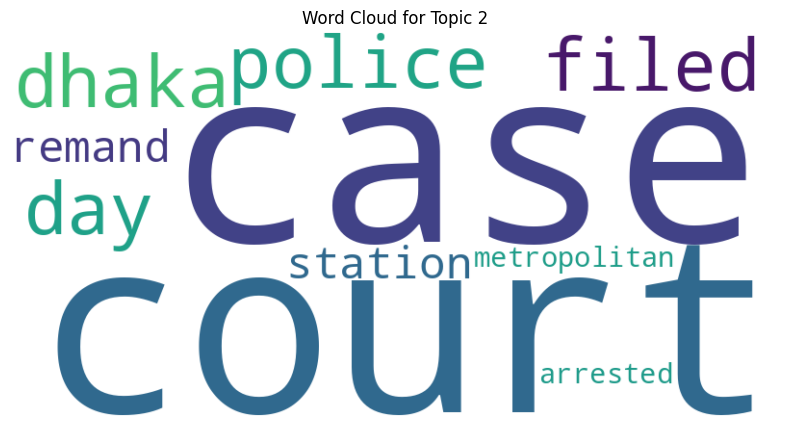

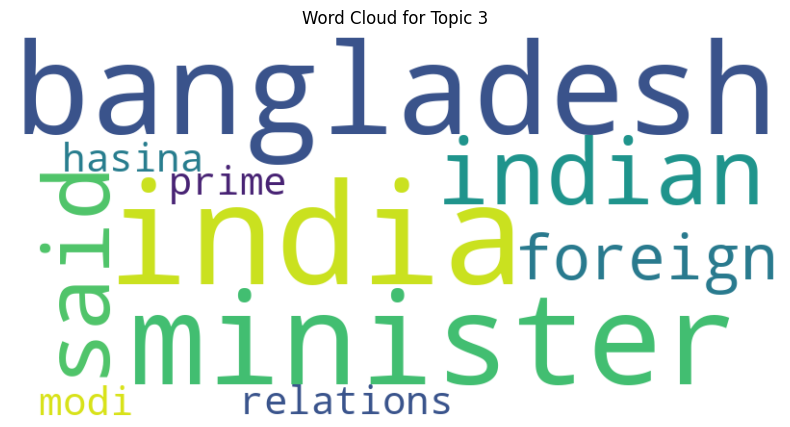

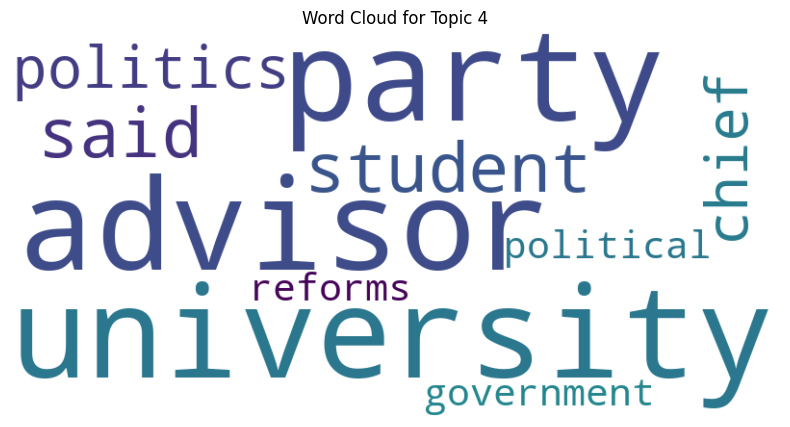

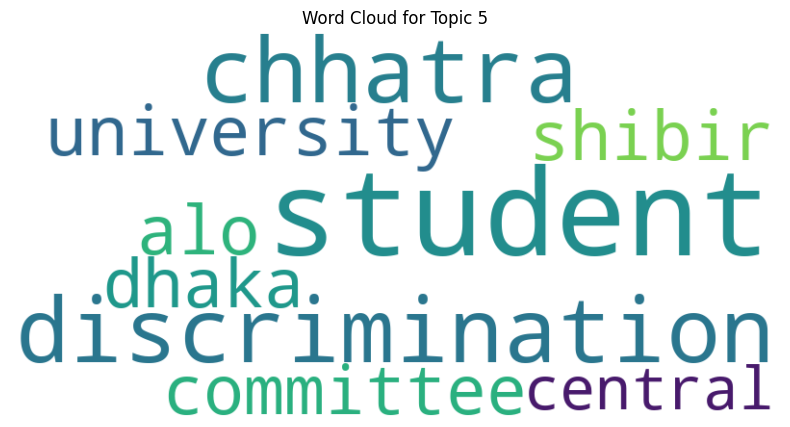

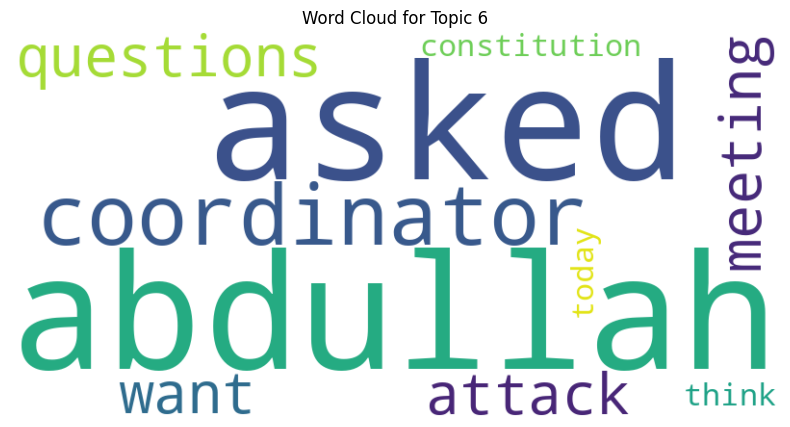

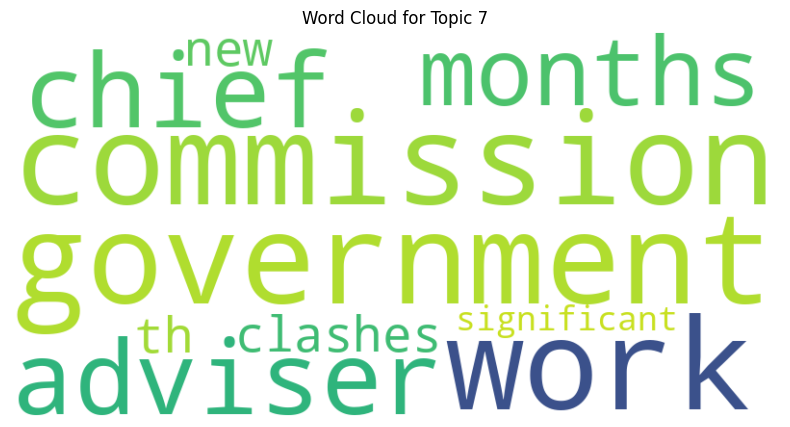

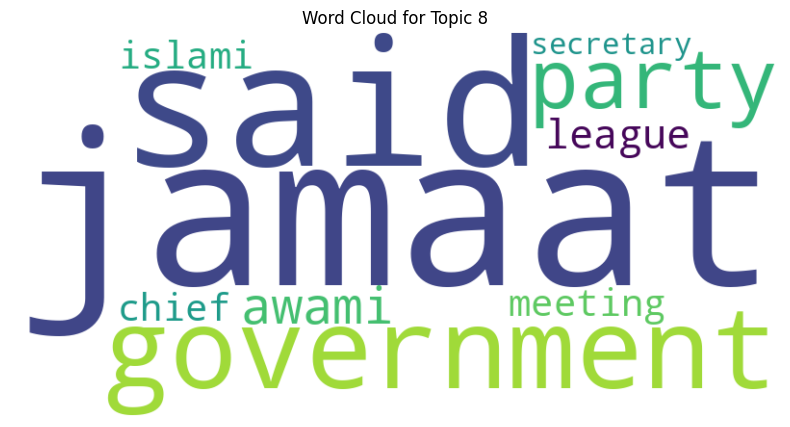

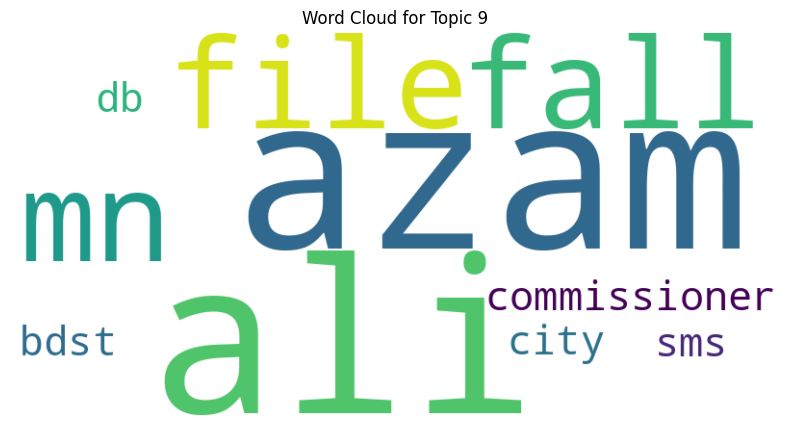

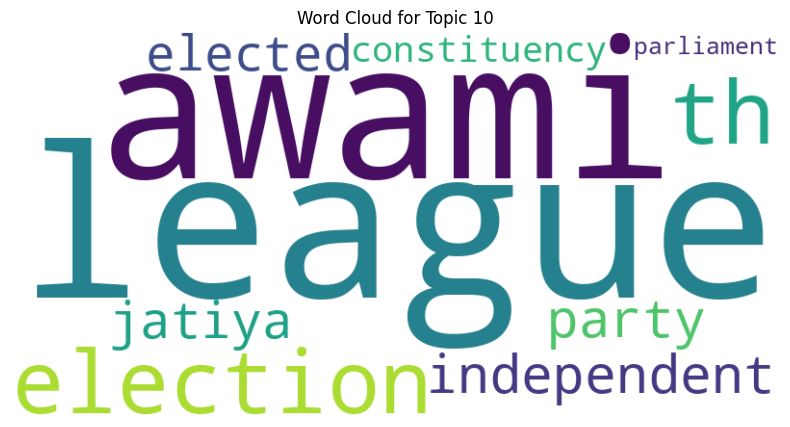

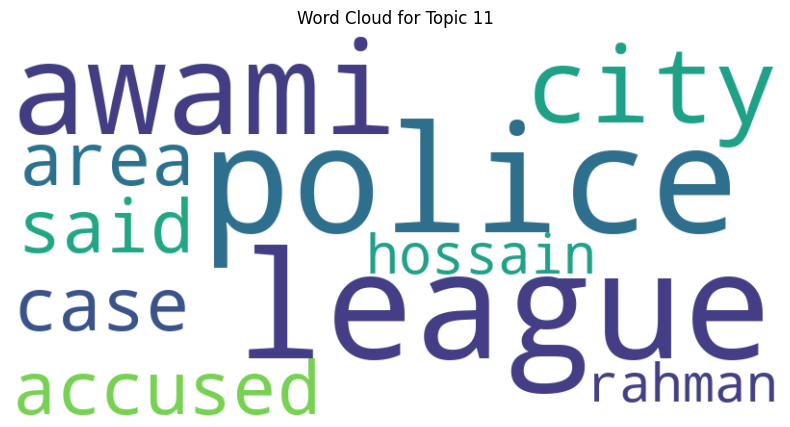

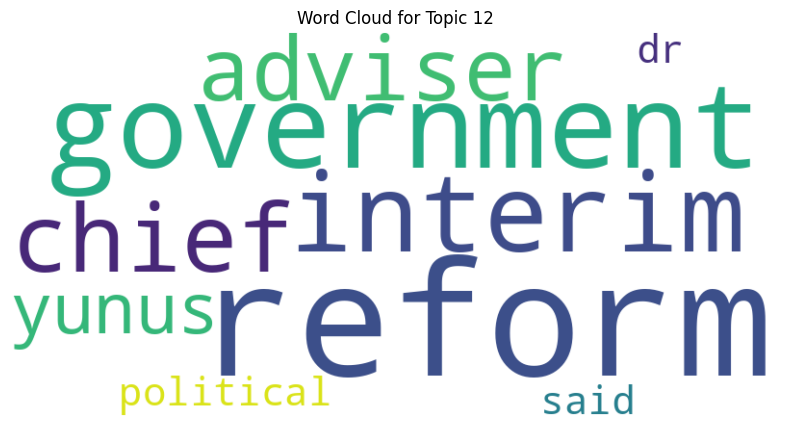

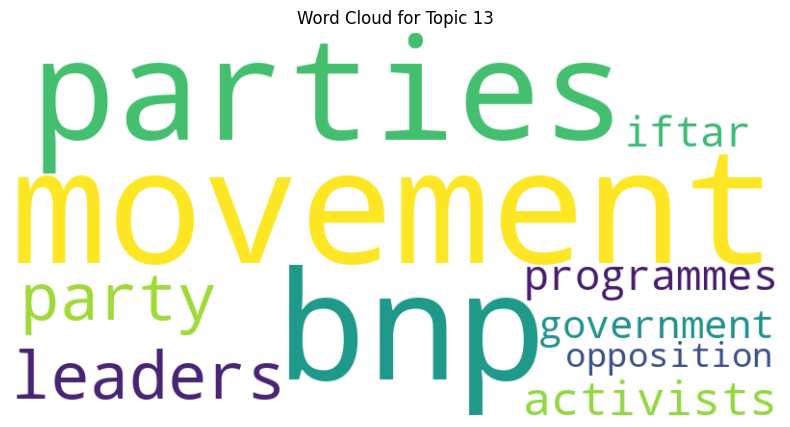

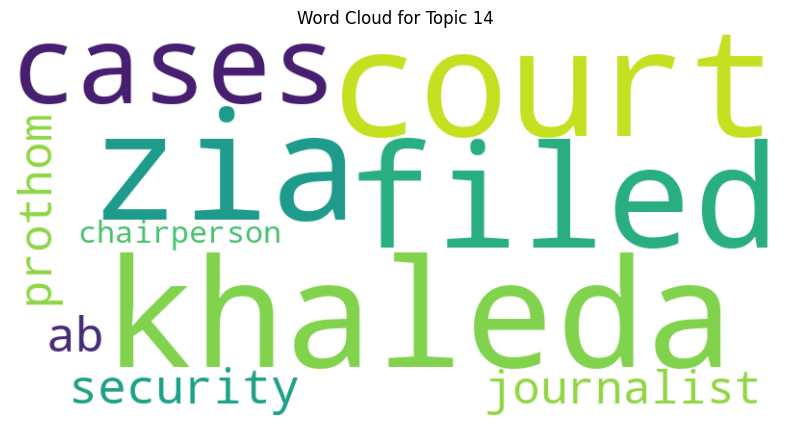

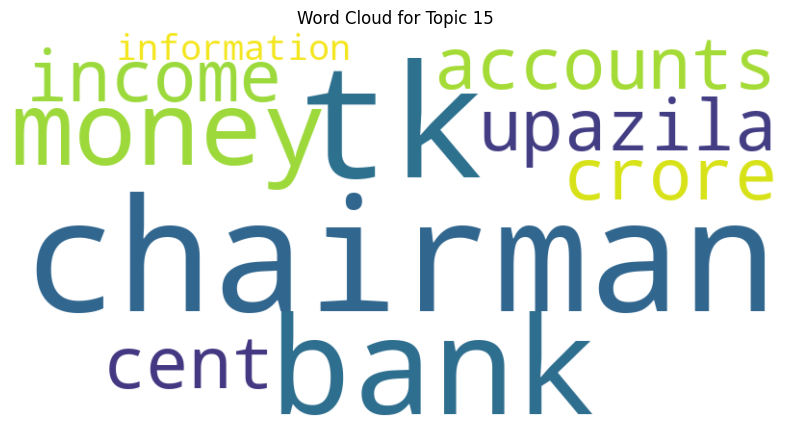

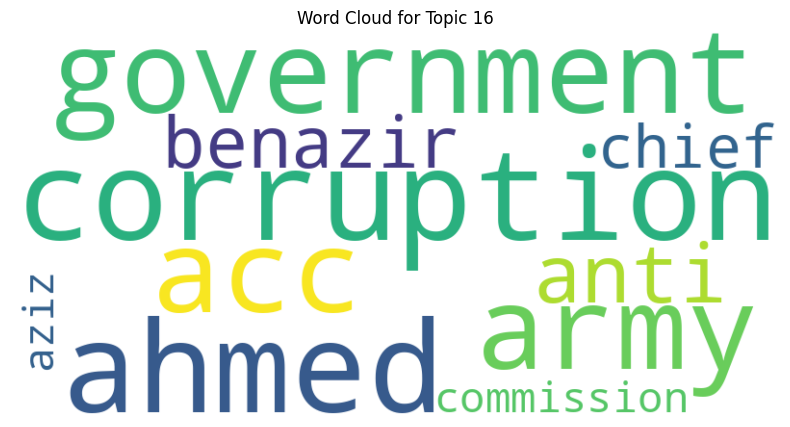

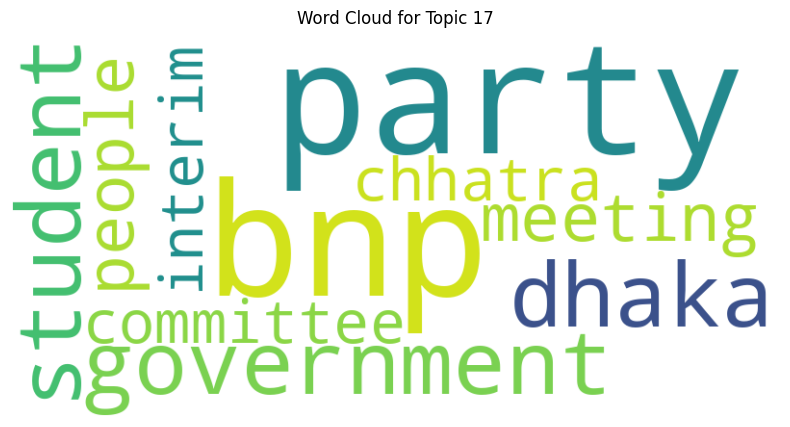

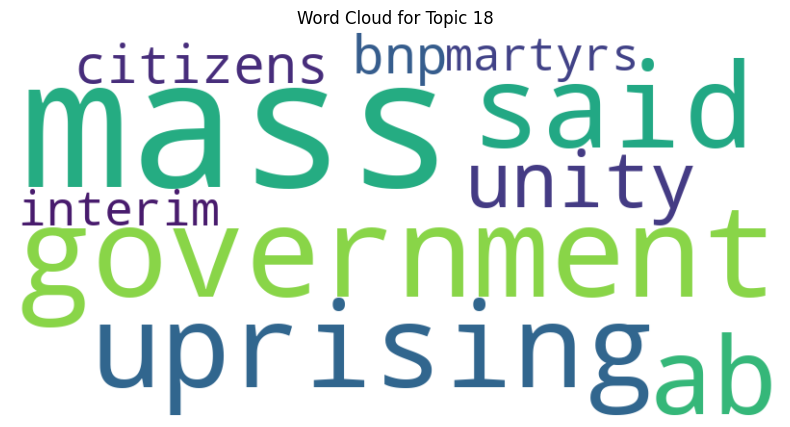

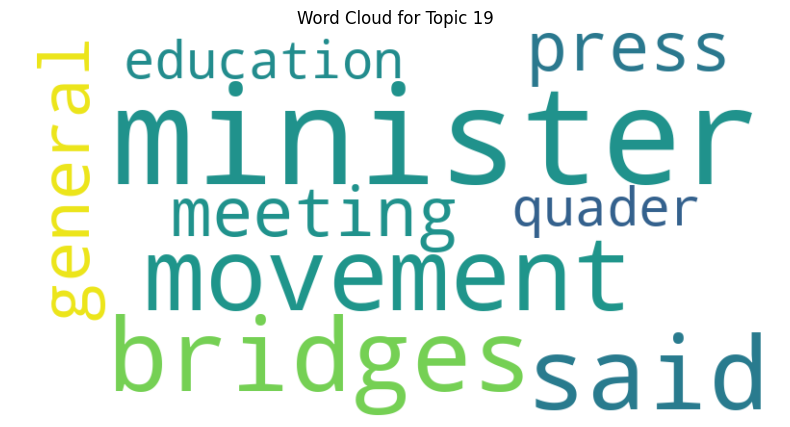

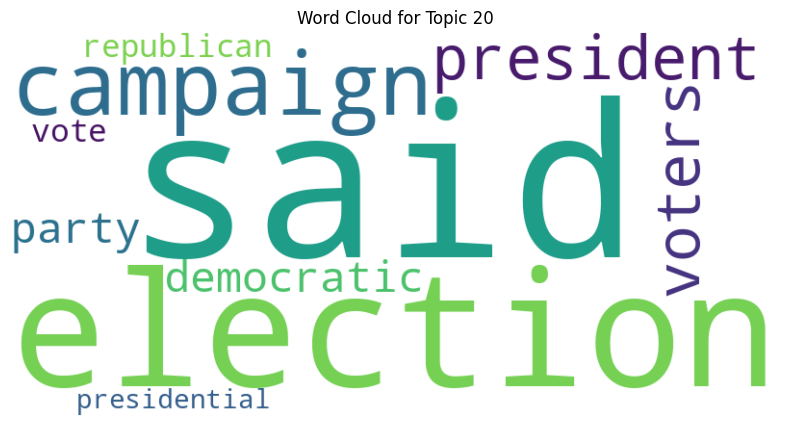

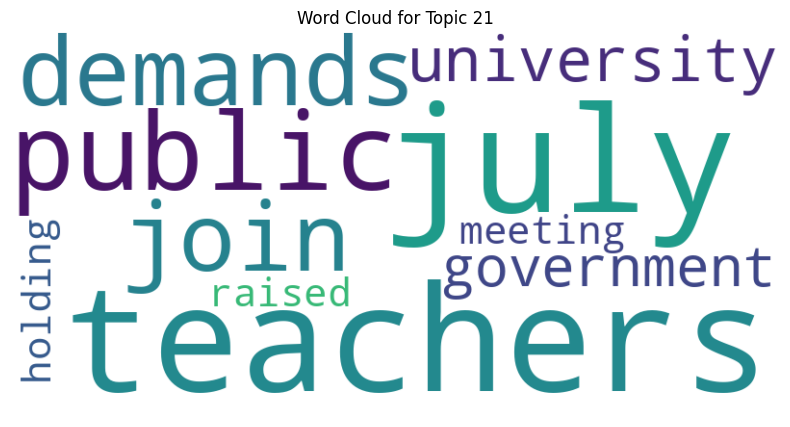

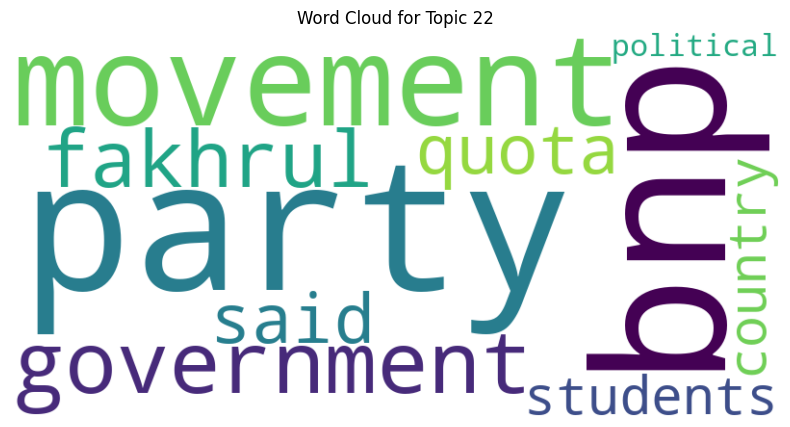

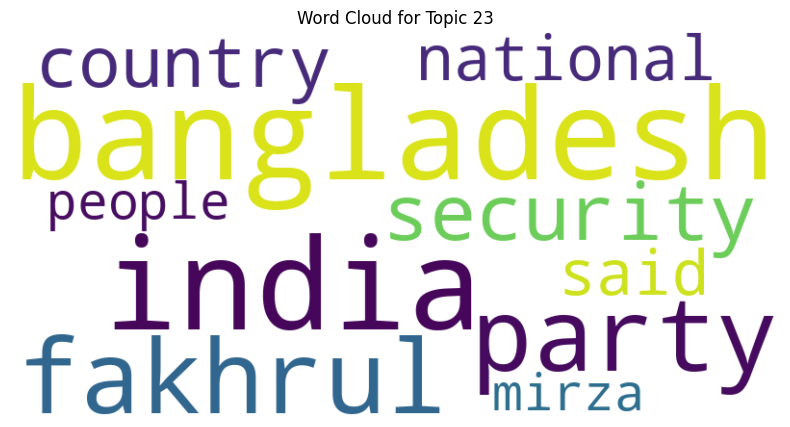

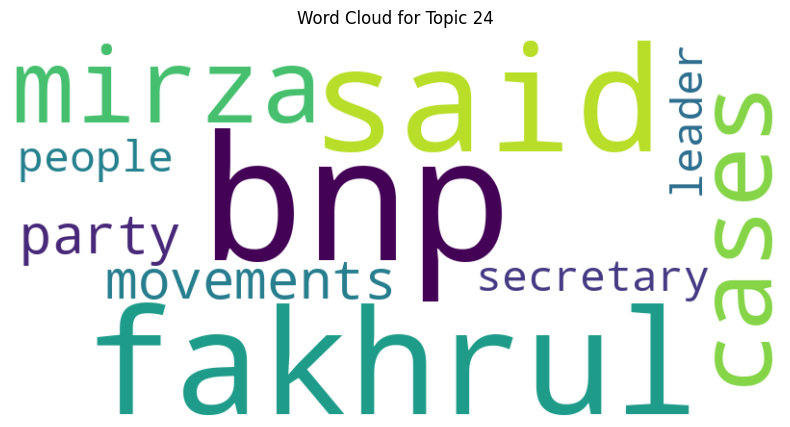

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Display word clouds for topics 0 to 4
for topic_idx in range(40):
    topic_key = f"Topic {topic_idx}"
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topics[topic_key])

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {topic_key}")
    plt.show()

In [ ]:
%%capture
!pip install pyLDAvis
!pip install bertopic

In [ ]:
import gensim.corpora as corpora
import gensim
from pprint import pprint
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from gensim.models import Nmf
from gensim.corpora.dictionary import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
from bertopic import BERTopic
#from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
texts = datascience_df['description_without_stopwords'].tolist()
print(texts)
texts2 = [[text for text in texts]]
dictionary = corpora.Dictionary(texts2)
corpus = [dictionary.doc2bow(text) for text in texts2]

[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

num_topics = 40
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=40,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

['bangladesh jamaat e islami amir chief shafiqur rahman sought trial bangladesh awami league black laws formulated party long stretch power awami league handed deserve quickly possible establishing justice jamaat chief said addressing members conference bangabandhu international conference centre bicc today sunday dhaka city south unit jamaat organised conference seek anything unjust upon anyone face trial black laws enacted long time would always say law equal judiciary independent awami league right reap benefits equal law let get deserve shafiqur rahman said said awami league history banning party established baksal banned political parties including party time people banned awami league help allah jamaat amir said expected awami league would learn lessons fall find way offering apology people country black take hue awami league rectify shafiqur rahman alleged awami league trying regroup garb different groups alleged whole tenure awami league extremism terrorism terrorised country a

In [ ]:
topics_label= {
    0:"Topic 0",
    1:"Topic 1",
    2:"Topic 2",
    3:"Topic 3",
    4:"Topic 4",
    5:"Topic 5",
    6:"Topic 6",
    7:"Topic 7",
    8:"Topic 8",
    9:"Topic 9",
    10:"Topic 10",
    11:"Topic 11",
    12:"Topic 12",
    13:"Topic 13",
    14:"Topic 14",
    15:"Topic 15",
    16:"Topic 16",
    17:"Topic 17",
    18:"Topic 18",
    19:"Topic 19",
    20:"Topic 20",
    21:"Topic 21",
    22:"Topic 22",
    23:"Topic 23",
    24:"Topic 24",
    25:"Topic 25",
    26:"Topic 26",
    27:"Topic 27",
    28:"Topic 28",
    29:"Topic 29",
    30:"Topic 30",
    31:"Topic 31",
    32:"Topic 32",
    33:"Topic 33",
    34:"Topic 34",
    35:"Topic 35",
    36:"Topic 36",
    37:"Topic 37",
    38:"Topic 38",
    39:"Topic 39",

}

In [ ]:
topic_assignments = lda.transform(tf)
datascience_df['dominant_topic']=topic_assignments.argmax(axis=1)
datascience_df.info()
datascience_df['topic_labels']=datascience_df['dominant_topic'].apply(lambda x :topics_label.get(x,"Unknown"))
datascience_df['dominant_topic'].value_counts()
datascience_df['topic_labels'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 2101
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   title                          2007 non-null   object        
 1   link                           2007 non-null   object        
 2   date                           2007 non-null   datetime64[ns]
 3   description                    2007 non-null   object        
 4   summary                        2007 non-null   object        
 5   description_without_stopwords  2007 non-null   object        
 6   dominant_topic                 2007 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 125.4+ KB


topic_labels
Topic 39    319
Topic 32    271
Topic 0     181
Topic 35    166
Topic 11    156
Topic 2     105
Topic 20    100
Topic 30     98
Topic 12     87
Topic 38     87
Topic 37     71
Topic 10     64
Topic 34     60
Topic 3      51
Topic 26     42
Topic 27     31
Topic 29     28
Topic 25     26
Topic 15     21
Topic 16     15
Topic 31     13
Topic 13     11
Topic 18      3
Topic 1       1
Name: count, dtype: int64

<ipython-input-6-448f132972e9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")


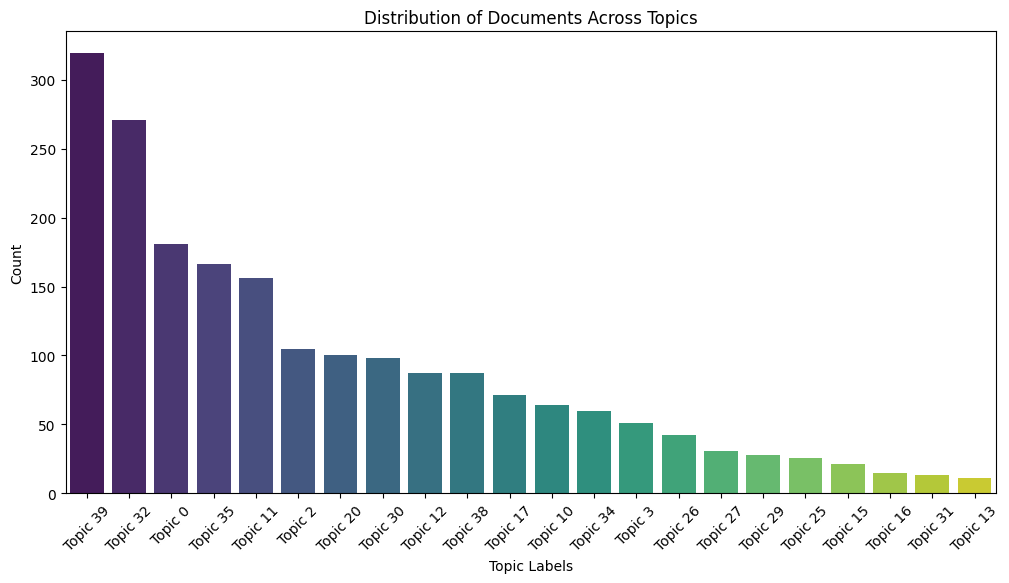

In [ ]:
topic_counts = pd.Series({
    "Topic 39": 319,
    "Topic 32": 271,
    "Topic 0": 181,
    "Topic 35": 166,
    "Topic 11":156,
    "Topic 2":105,
    "Topic 20":100,
    "Topic 30":98,
    "Topic 12":87,
    "Topic 38":87,
    "Topic 17":71,
    "Topic 10":64,
    "Topic 34":60,
    "Topic 3":51,
    "Topic 26":42,
    "Topic 27":31,
    "Topic 29":28,
    "Topic 25":26,
    "Topic 15":21,
    "Topic 16":15,
    "Topic 31":13,
    "Topic 13":11

})

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")

# Labeling the chart
plt.xlabel("Topic Labels")
plt.ylabel("Count")
plt.title("Distribution of Documents Across Topics")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

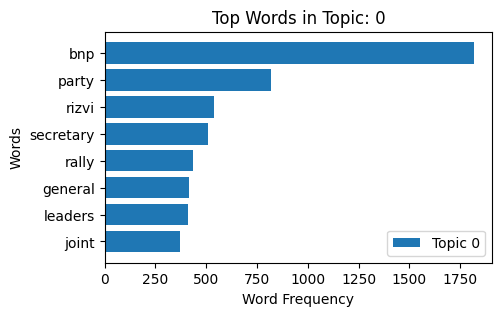

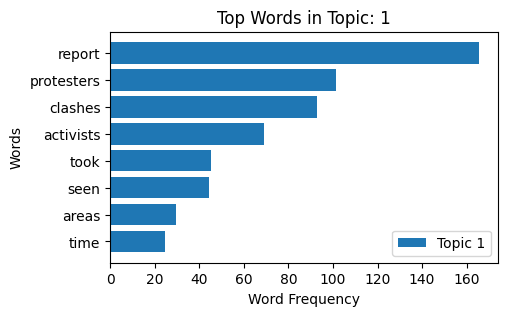

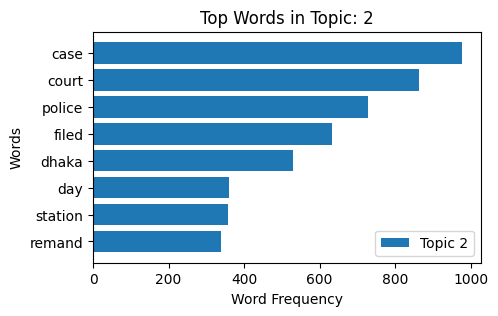

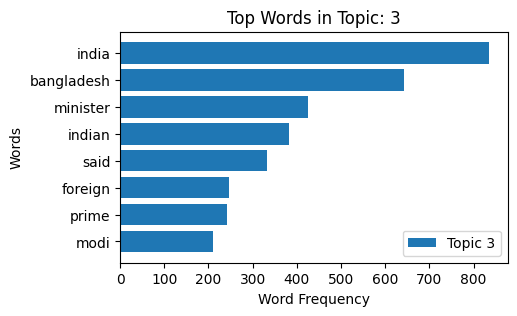

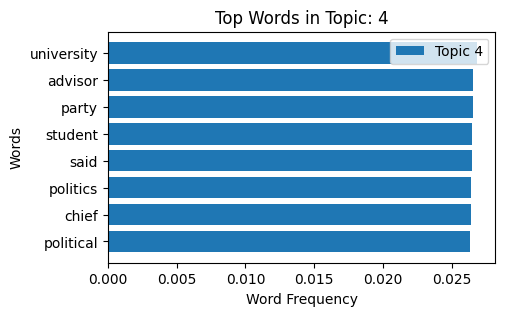

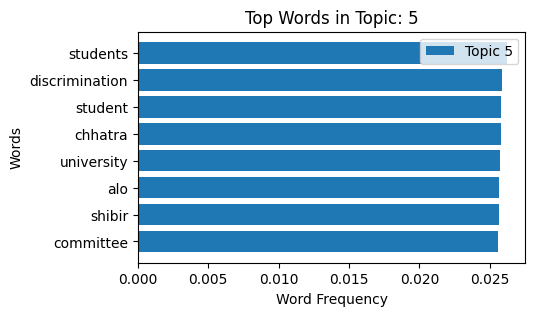

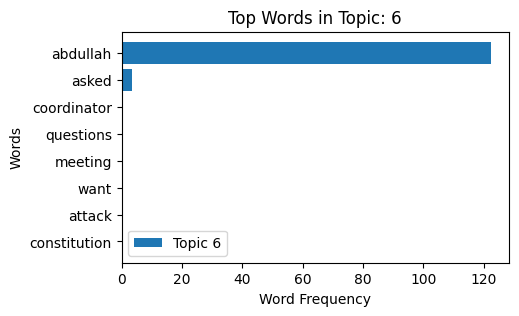

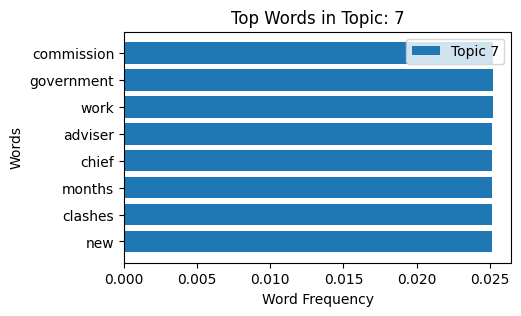

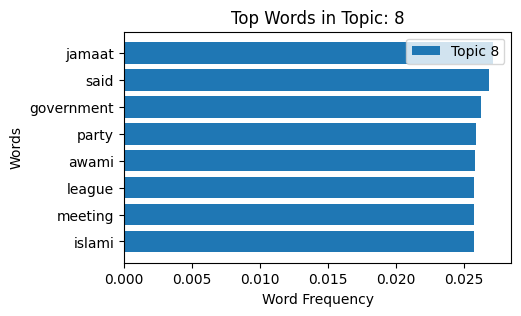

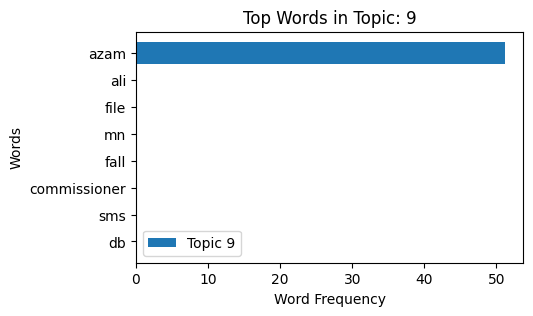

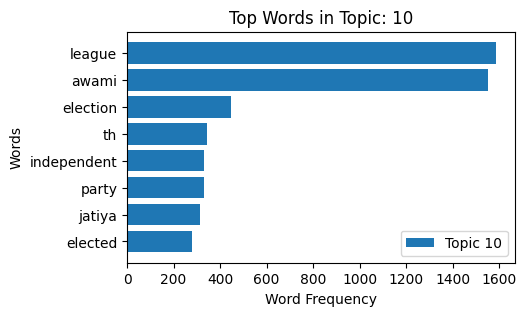

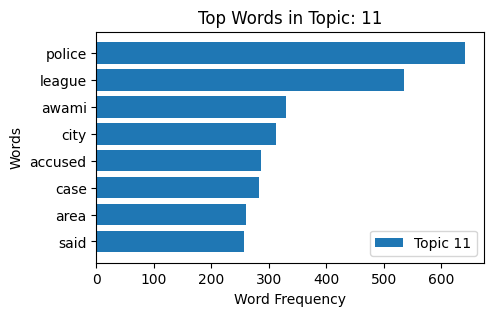

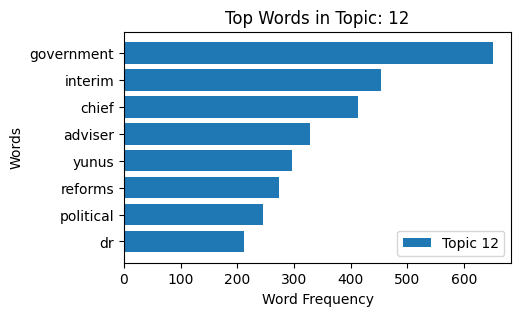

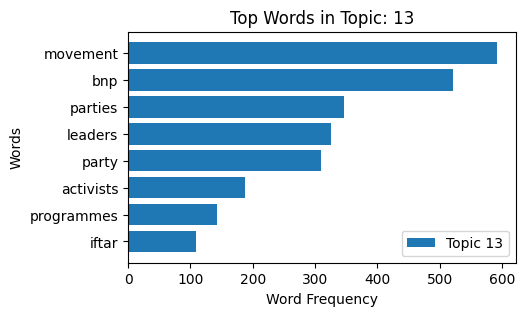

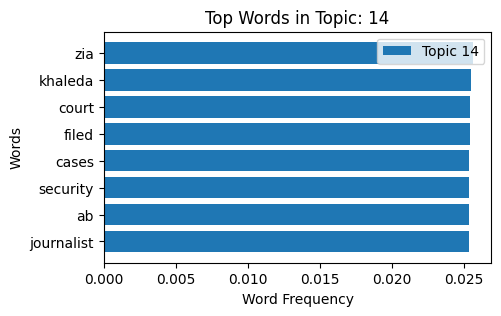

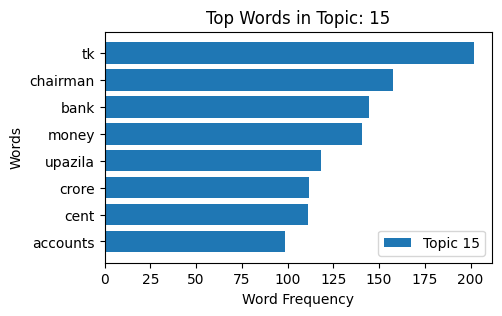

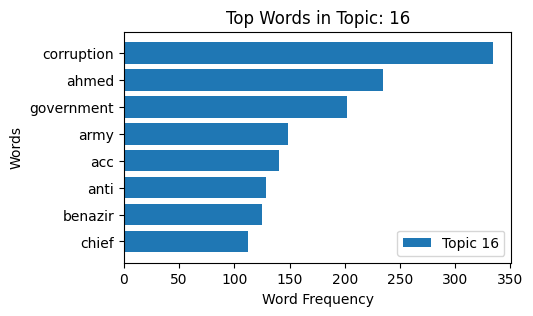

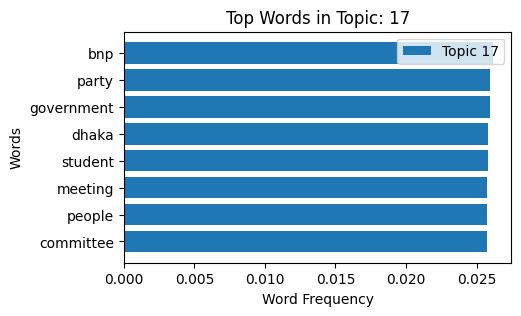

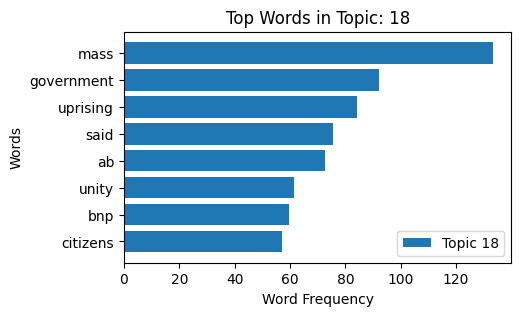

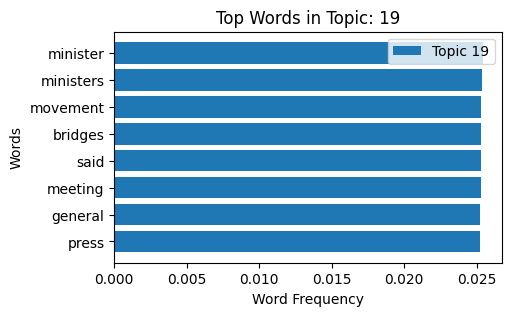

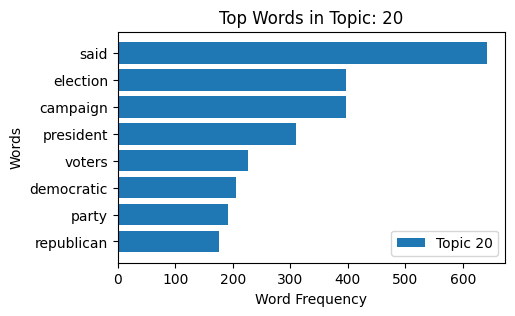

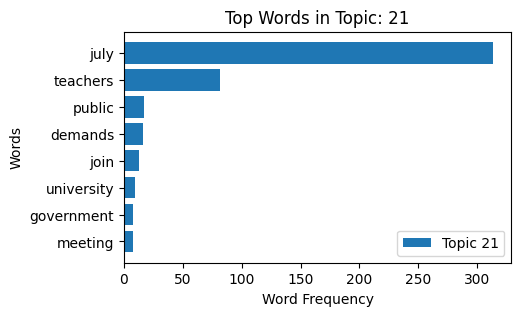

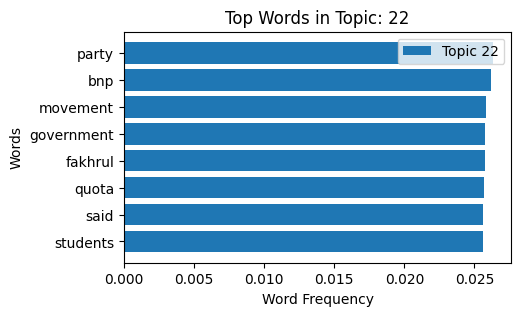

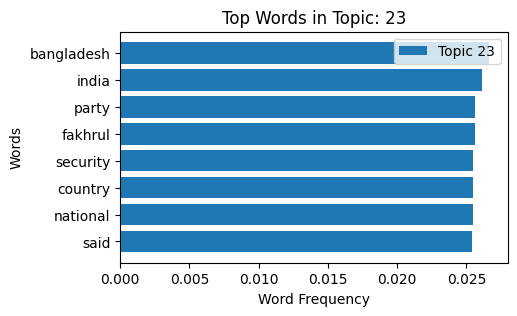

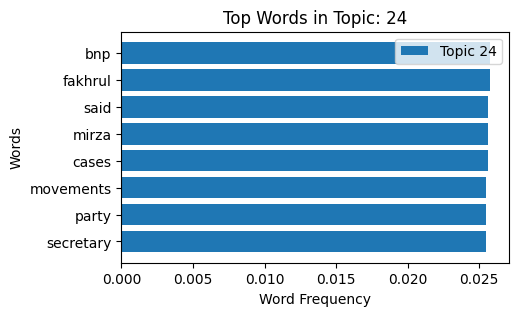

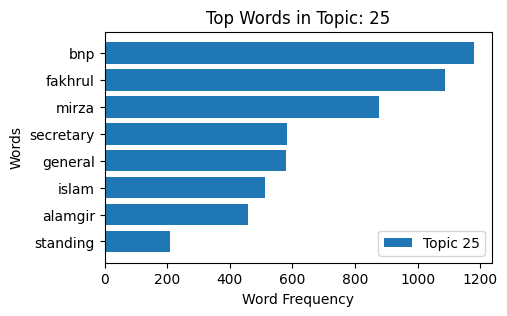

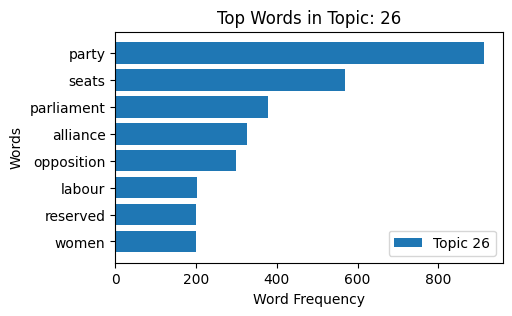

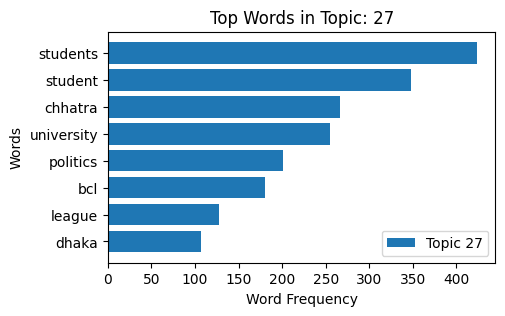

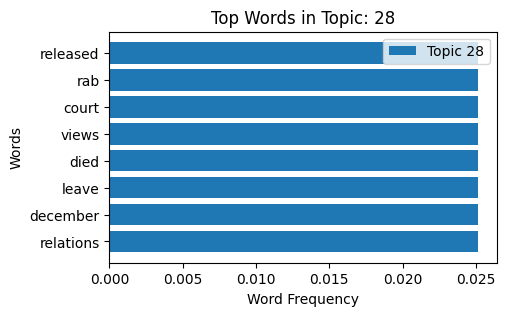

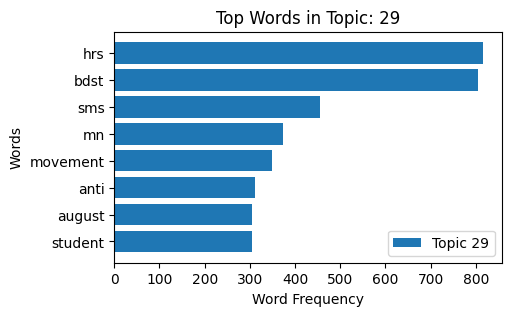

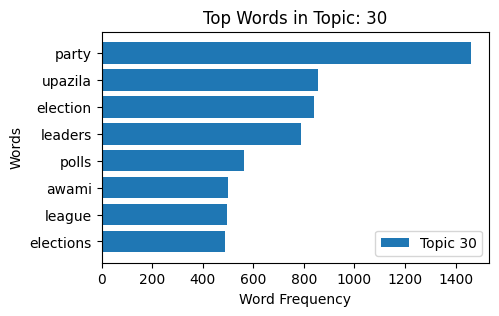

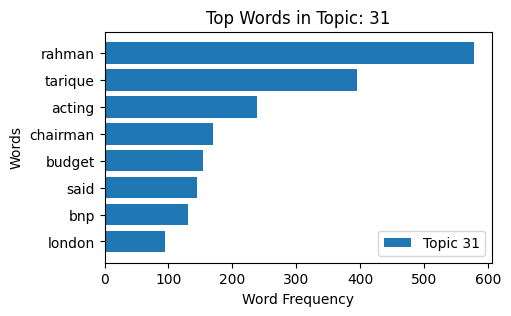

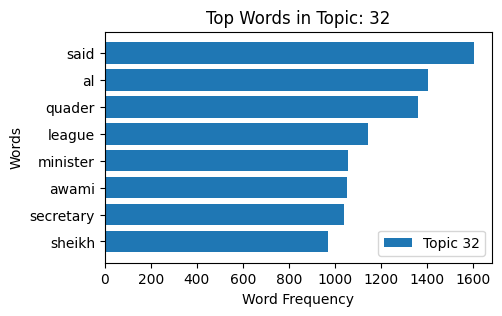

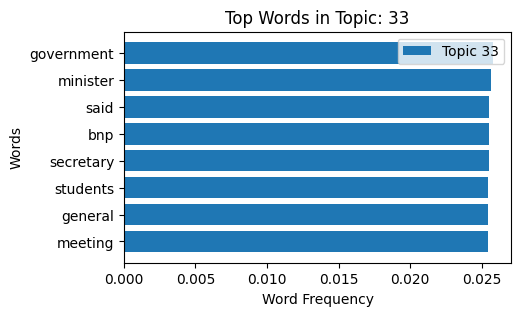

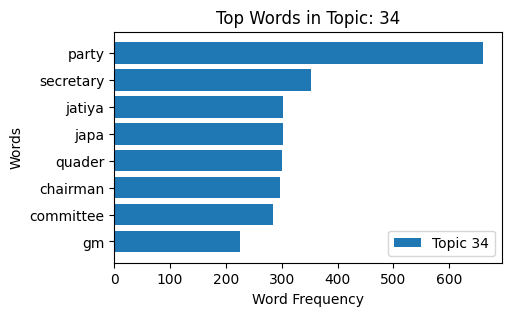

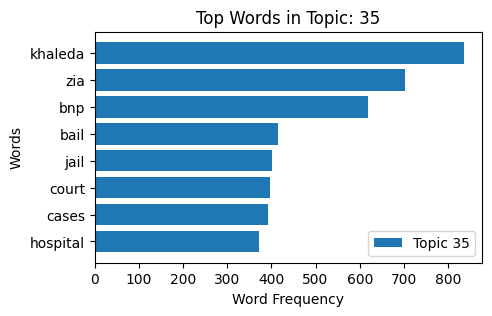

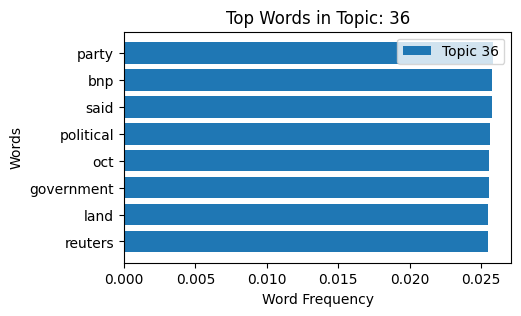

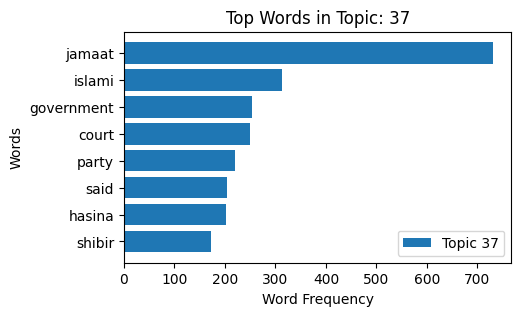

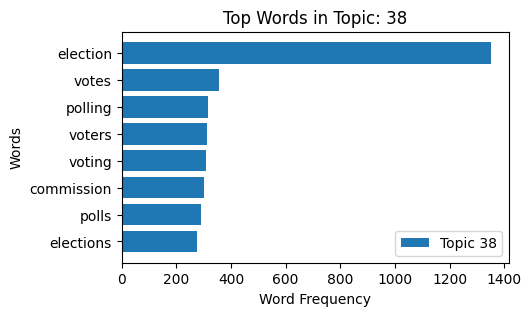

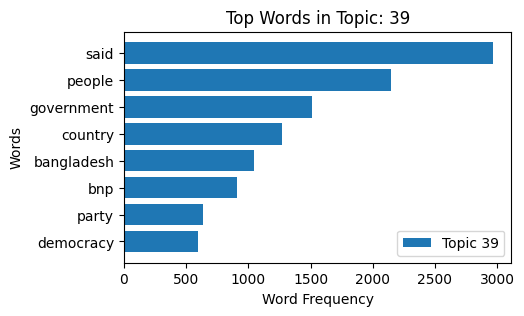

In [ ]:
feature_names = tf_vectorizer.get_feature_names_out()  # Get feature names from vectorizer

# Extract word counts for each topic
topic_word_distributions = lda.components_  # Get word-topic distributions
num_top_words = 5  # Number of words to visualize per topic

# Create a DataFrame to store top words per topic
topic_word_df = pd.DataFrame()

for topic_idx, topic in enumerate(topic_word_distributions):
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]  # Get indices of top words
    top_words = [feature_names[i] for i in top_words_indices]
    word_counts = [topic[i] for i in top_words_indices]

    temp_df = pd.DataFrame({"Word": top_words, "Count": word_counts})
    temp_df["Topic"] = f"Topic {topic_idx}"

    topic_word_df = pd.concat([topic_word_df, temp_df], ignore_index=True)

# Plot word counts per topic
count = 0;

for topic in topic_word_df["Topic"].unique():
    plt.figure(figsize=(15, 8))
    subset = topic_word_df[topic_word_df["Topic"] == topic]
    plt.barh(subset["Word"], subset["Count"], label=topic)
    plt.xlabel("Word Frequency")
    plt.ylabel("Words")
    plt.title("Top Words in Topic: " + str(count))
    plt.legend()
    plt.gca().invert_yaxis()  # Reverse y-axis for better readability
    plt.show()
    count = count + 1



In [9]:
%%capture
!pip install pyLDAvis
!pip install bertopic
import gensim.corpora as corpora
import gensim
from pprint import pprint
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from gensim.models import Nmf
from gensim.corpora.dictionary import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
from bertopic import BERTopic
#from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
texts = datascience_df['description_without_stopwords'].tolist()
#print(texts)
texts2 = [[text for text in texts]]
dictionary = corpora.Dictionary(texts2)
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts2]

[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20,
                                           random_state=1234)
def calculate_coherence_score(n):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=n,
                                           random_state=1234,
                                               )
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts2, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

topic_nums = list(np.arange(2, 19 + 1, 1))
coherence_scores = []
for n in topic_nums:
    coherence_score = calculate_coherence_score(n)
    coherence_scores.append(coherence_score)
    print(f"n : {n} ;  Score : {coherence_score}")